세팅

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic' #sns 한글화
# https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False #searbon 마이너스 부호 살리기

데이터 불러오기

In [5]:
df = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/train.csv')
df_test = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/test.csv')
submission = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/sample_submission.csv')

데이터 살펴보기

In [6]:
df.info() #각 칼럼의 상관관계를 분석해보자. object -> int 변환이 필수적이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
#'실제 식사 가능한 인원' 칼럼 추가
df['실제점심식사가능자수'] = df['본사정원수']-df['본사휴가자수']-df['본사출장자수']-df['현본사소속재택근무자수']

In [8]:
#칼럼 잘 추가 되었는지 확인
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,실제점심식사가능자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0


In [9]:
#조식, 중식, 석식 메뉴 삭제 (추후에 알아 보자)
인트만 = df.drop(labels= '조식메뉴', axis=1)
인트만 = 인트만.drop(labels= '중식메뉴', axis=1)
인트만 = 인트만.drop(labels= '석식메뉴', axis=1)

In [10]:
#일자와 요일이 object. 변환이 필요함.
인트만.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   중식계             1205 non-null   float64
 8   석식계             1205 non-null   float64
 9   실제점심식사가능자수      1205 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 94.3+ KB


In [11]:
#corr을 위해 일자를 int로 변환하자.
#인트 변환 전, datatime으로 변환
인트만['일자']= pd.to_datetime(인트만['일자'])

In [12]:
인트만.info() #datatime64 변환완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   중식계             1205 non-null   float64       
 8   석식계             1205 non-null   float64       
 9   실제점심식사가능자수      1205 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 94.3+ KB


In [13]:
# 연월일 칼럼 추가

인트만['연도'] = 인트만['일자'].dt.year
인트만['월'] = 인트만['일자'].dt.month
인트만['일'] = 인트만['일자'].dt.day

# https://bigdaheta.tistory.com/16

In [14]:
인트만.head() #일자는 이제 필요없다. 

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,2016,2,3
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,2016,2,4
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,2016,2,5


In [15]:
#일자 삭제
인트만 = 인트만.drop(['일자'], axis=1)
#이유는 모르겠으나 레이블을 안쓰고, 요런식으로 쓰니...

In [16]:
#일자가 잘 삭제되었다.
인트만.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
0,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,2016,2,1
1,화,2601,50,173,319,0.0,867.0,560.0,2378.0,2016,2,2
2,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,2016,2,3
3,목,2601,104,220,355,0.0,978.0,525.0,2277.0,2016,2,4
4,금,2601,278,181,34,0.0,925.0,330.0,2142.0,2016,2,5


In [17]:
#요일도 인트로 변환하자
weekday = {"월": 1, "화": 2, "수": 3, "목": 4, "금": 5}

인트만["요일"] = 인트만["요일"].map(weekday)


#아래는 레이블 인코딩으로 시도했던 기록.. 
# #레이블 인코딩 하면, 순서가 요일이 가나다 순서대로 정렬되어 인식이 어려움.
# 버림.
# # input_labels = ['월', '화','수', '목','금']

# cols = 인트만.select_dtypes(include='object').columns
# for col in cols:
#     le = LabelEncoder()
#     인트만[col] = le.fit_transform(인트만[col])

In [18]:
#요일도 숫자로 잘 변환되었다.
인트만.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
0,1,2601,50,150,238,0.0,1039.0,331.0,2401.0,2016,2,1
1,2,2601,50,173,319,0.0,867.0,560.0,2378.0,2016,2,2
2,3,2601,56,180,111,0.0,1017.0,573.0,2365.0,2016,2,3
3,4,2601,104,220,355,0.0,978.0,525.0,2277.0,2016,2,4
4,5,2601,278,181,34,0.0,925.0,330.0,2142.0,2016,2,5


In [19]:
#상관관계 분석(중식계 순으로 나열) 
인트만_sort = 인트만.corr()["중식계"].sort_values(ascending=False)
인트만_sort

#요일이 가장 중요

중식계               1.000000
본사시간외근무명령서승인건수    0.535611
석식계               0.508287
실제점심식사가능자수        0.286810
현본사소속재택근무자수       0.076509
연도               -0.078804
일                -0.097392
본사정원수            -0.115529
월                -0.154664
본사휴가자수           -0.391975
본사출장자수           -0.512680
요일               -0.731563
Name: 중식계, dtype: float64

In [20]:
#상관관계 분석(석식계 순으로 나열) 
인트만_sort = 인트만.corr()["석식계"].sort_values(ascending=False)
인트만_sort

#본사시간외근무명령서승인건수가 가장 중요

석식계               1.000000
본사시간외근무명령서승인건수    0.571168
중식계               0.508287
실제점심식사가능자수        0.172373
현본사소속재택근무자수      -0.057534
월                -0.127142
본사정원수            -0.173852
일                -0.185565
본사출장자수           -0.188164
연도               -0.194792
요일               -0.312112
본사휴가자수           -0.316894
Name: 석식계, dtype: float64

In [21]:
인트만중식기준정렬 = 인트만[['중식계','본사시간외근무명령서승인건수','석식계','실제점심식사가능자수','현본사소속재택근무자수','연도','일','본사정원수','월','본사휴가자수','본사출장자수','요일']]
인트만석식기준정렬 = 인트만[['석식계','본사시간외근무명령서승인건수','중식계','실제점심식사가능자수','현본사소속재택근무자수','월','본사정원수','일','본사출장자수','연도','요일','본사휴가자수']]

In [22]:
인트만중식기준정렬상관관계= 인트만중식기준정렬.corr()
인트만중식기준정렬상관관계

,중식계,본사시간외근무명령서승인건수,석식계,실제점심식사가능자수,현본사소속재택근무자수,연도,일,본사정원수,월,본사휴가자수,본사출장자수,요일
중식계,1.000000,0.535611,0.508287,0.286810,0.076509,-0.078804,-0.097392,-0.115529,-0.154664,-0.391975,-0.512680,-0.731563
본사시간외근무명령서승인건수,0.535611,1.000000,0.571168,0.309118,0.156792,0.181749,-0.093606,0.146544,0.018316,-0.230789,-0.308757,-0.554359
석식계,0.508287,0.571168,1.000000,0.172373,-0.057534,-0.194792,-0.185565,-0.173852,-0.127142,-0.316894,-0.188164,-0.312112
실제점심식사가능자수,0.286810,0.309118,0.172373,1.000000,-0.150393,0.306486,-0.028433,0.503771,0.006330,-0.552661,0.136389,-0.250092
현본사소속재택근무자수,0.076509,0.156792,-0.057534,-0.150393,1.000000,0.571133,-0.031583,0.452293,0.033586,0.065397,-0.352643,-0.026795
연도,-0.078804,0.181749,-0.194792,0.306486,0.571133,1.000000,-0.029843,0.764078,-0.092612,0.129875,-0.109583,-0.010725
일,-0.097392,-0.093606,-0.185565,-0.028433,-0.031583,-0.029843,1.000000,-0.020737,0.002120,-0.009210,0.144007,-0.002428
본사정원수,-0.115529,0.146544,-0.173852,0.503771,0.452293,0.764078,-0.020737,1.000000,0.244705,0.244666,-0.061688,-0.008577
월,-0.154664,0.018316,-0.127142,0.006330,0.033586,-0.092612,0.002120,0.244705,1.000000,0.193627,0.210877,0.002540
본사휴가자수,-0.391975,-0.230789,-0.316894,-0.552661,0.065397,0.129875,-0.009210,0.244666,0.193627,1.000000,-0.273318,0.155578


In [23]:
인트만석식기준정렬상관관계= 인트만석식기준정렬.corr()
인트만석식기준정렬상관관계

,석식계,본사시간외근무명령서승인건수,중식계,실제점심식사가능자수,현본사소속재택근무자수,월,본사정원수,일,본사출장자수,연도,요일,본사휴가자수
석식계,1.000000,0.571168,0.508287,0.172373,-0.057534,-0.127142,-0.173852,-0.185565,-0.188164,-0.194792,-0.312112,-0.316894
본사시간외근무명령서승인건수,0.571168,1.000000,0.535611,0.309118,0.156792,0.018316,0.146544,-0.093606,-0.308757,0.181749,-0.554359,-0.230789
중식계,0.508287,0.535611,1.000000,0.286810,0.076509,-0.154664,-0.115529,-0.097392,-0.512680,-0.078804,-0.731563,-0.391975
실제점심식사가능자수,0.172373,0.309118,0.286810,1.000000,-0.150393,0.006330,0.503771,-0.028433,0.136389,0.306486,-0.250092,-0.552661
현본사소속재택근무자수,-0.057534,0.156792,0.076509,-0.150393,1.000000,0.033586,0.452293,-0.031583,-0.352643,0.571133,-0.026795,0.065397
월,-0.127142,0.018316,-0.154664,0.006330,0.033586,1.000000,0.244705,0.002120,0.210877,-0.092612,0.002540,0.193627
본사정원수,-0.173852,0.146544,-0.115529,0.503771,0.452293,0.244705,1.000000,-0.020737,-0.061688,0.764078,-0.008577,0.244666
일,-0.185565,-0.093606,-0.097392,-0.028433,-0.031583,0.002120,-0.020737,1.000000,0.144007,-0.029843,-0.002428,-0.009210
본사출장자수,-0.188164,-0.308757,-0.512680,0.136389,-0.352643,0.210877,-0.061688,0.144007,1.000000,-0.109583,0.532962,-0.273318
연도,-0.194792,0.181749,-0.078804,0.306486,0.571133,-0.092612,0.764078,-0.029843,-0.109583,1.000000,-0.010725,0.129875


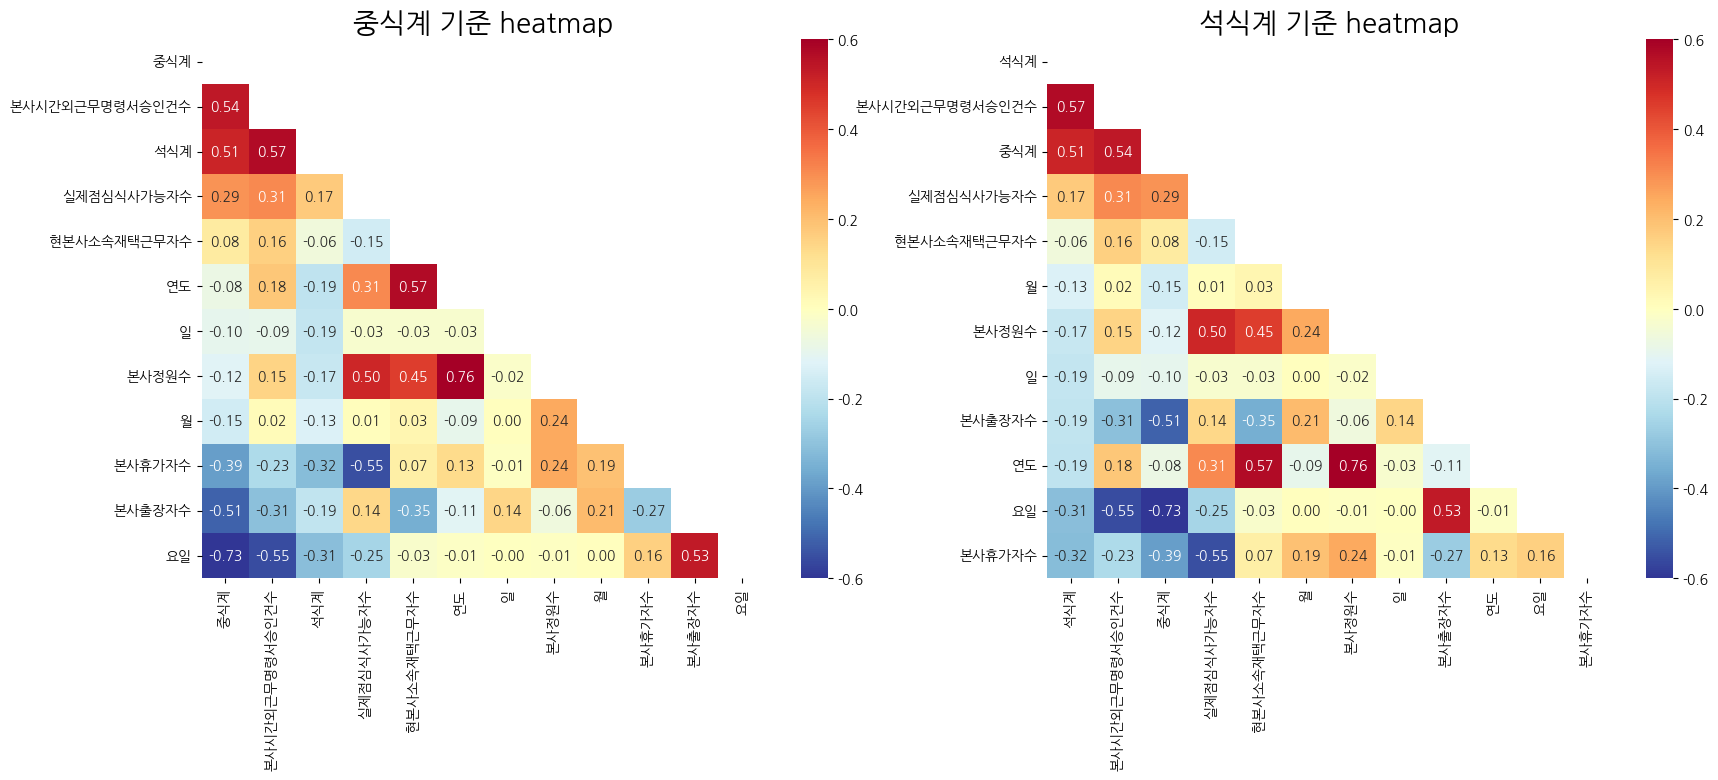

In [24]:
plt.figure(figsize=(20,7))


plt.subplot(1, 2, 1)
mask=np.zeros_like(인트만중식기준정렬상관관계,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.title('중식계 기준 heatmap', fontsize=20)
sns.heatmap(인트만중식기준정렬상관관계, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               fmt='.2f',
               vmin = -0.6, vmax = 0.6, #컬러차트 범위 지정
               mask=mask, #절반만 표시
              )

plt.subplot(1, 2, 2)
mask=np.zeros_like(인트만석식기준정렬상관관계,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.title('석식계 기준 heatmap', fontsize=20)
sns.heatmap(인트만석식기준정렬상관관계, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               fmt='.2f',
               vmin = -0.6, vmax = 0.6, #컬러차트 범위 지정
               mask=mask #절반만 표시
              )


# plt.update_layout(autorange="reversed")
plt.show() 

# 양의 상관관계
# 석식 - 근무명령서 승인건수 = 0.57
# 중식 - 석식= 0.51
# 요일 - 중식 = 0.58
# 중식 - 근무명령서 승인건수 = 0.54

# 음의 상관관계
# 본사출장자수 - 중식 = -0.51
# 본사휴가자수 - 중식 = 0.39

# 본사 정원수 - 현본사재택근무자수 = 0.57
# 본사 정원수 - 연도 = 0.76

In [25]:
# sns.pairplot(인트만, hue='중식계', palette='husl')
# sns.pairplot(인트만, hue='석식계', palette='husl')

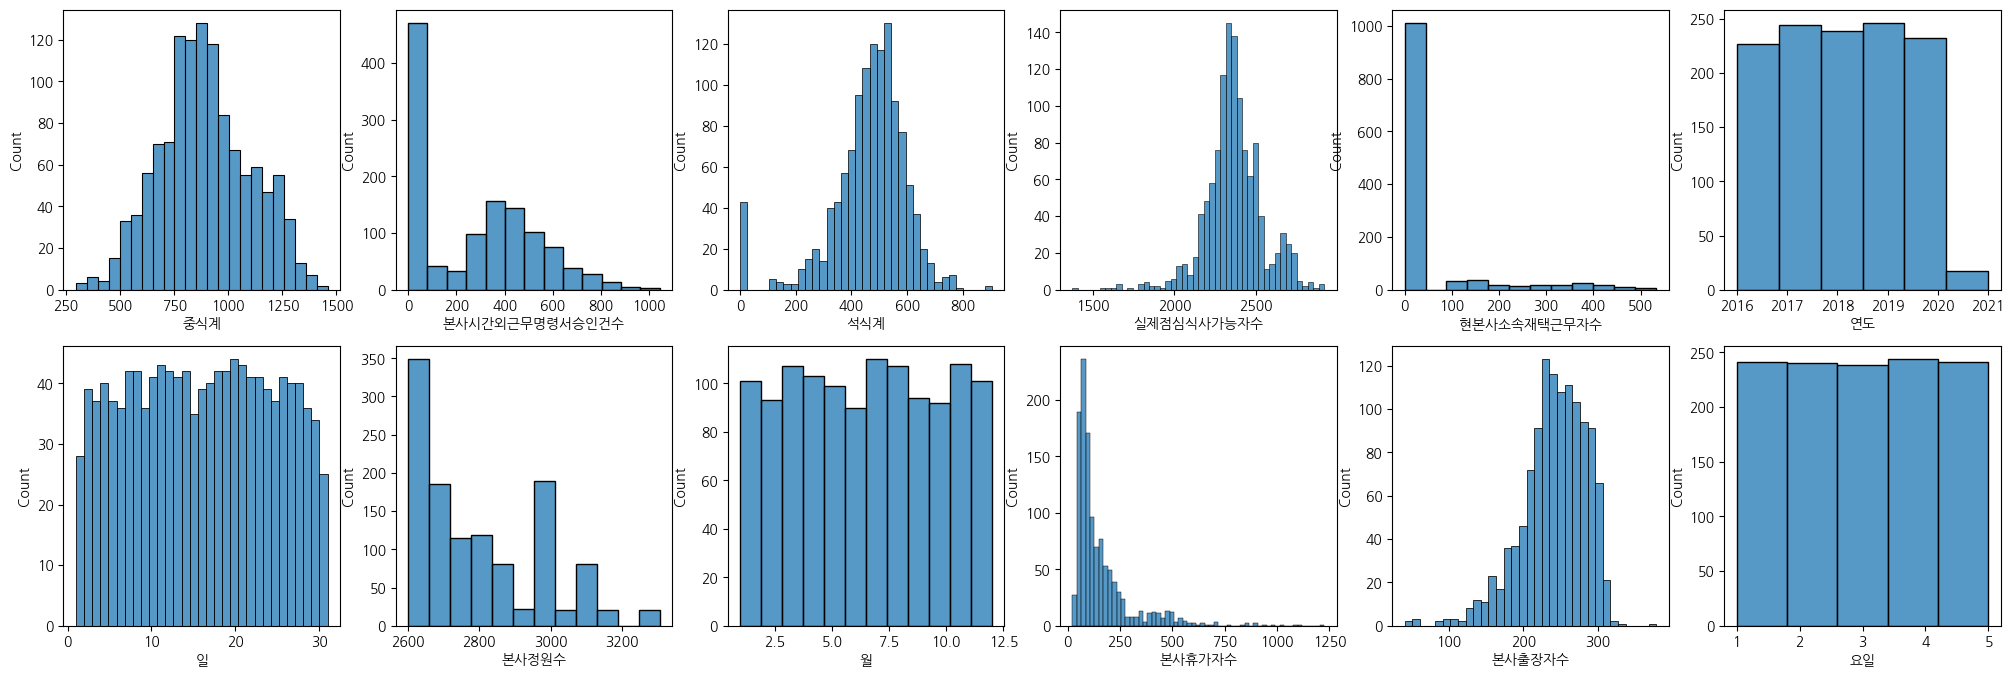

In [26]:
plt.figure(figsize=(25,8))
plt.subplot(2, 6, 1)
sns.histplot(인트만['중식계'])

plt.subplot(2, 6, 2)
sns.histplot(인트만['본사시간외근무명령서승인건수'])

plt.subplot(2, 6, 3)
sns.histplot(인트만['석식계'])

plt.subplot(2, 6, 4)
sns.histplot(인트만['실제점심식사가능자수'])

plt.subplot(2, 6, 5)
sns.histplot(인트만['현본사소속재택근무자수'])

plt.subplot(2, 6, 6)
sns.histplot(인트만['연도'], bins=6)

plt.subplot(2, 6, 7)
sns.histplot(인트만['일'], bins=31)

plt.subplot(2, 6, 8)
sns.histplot(인트만['본사정원수'])

plt.subplot(2, 6, 9)
sns.histplot(인트만['월'], bins=12)

plt.subplot(2, 6, 10)
sns.histplot(인트만['본사휴가자수'])

plt.subplot(2, 6, 11)
sns.histplot(인트만['본사출장자수'])

plt.subplot(2, 6, 12)
sns.histplot(인트만['요일'], bins=5)

plt.show()


In [27]:
# plt.figure(figsize=(5,5))


# sns.barplot(x="요일", y="중식계", data=인트만)
# plt.title("요일별 점심시간 수")
# plt.show()

# #레이블인코딩이 가나다 순서로 되어서 월화수목금이 01234 가 아니란 것을 깨달음.. ㅋㅋㅋㅋㅋㅋㅋ

In [28]:
# plt.figure(figsize=(5,5))


# sns.barplot(x="요일", y="중식계", data=df)
# # sns.barplot(x="요일", y="중식계", data=df)
# plt.title("요일별 점심시간 수")
# plt.show()

# #요일에 있는 중식계를 자동으로 평균내어주는 것인가.. 월요일은 한 개가 아니라 수십개의 월요일이 있거늘,. 어찌 하나의 막대로 탄생된단 말인가!

# #barplot은 기본적으로 각 범주에 대응하는 수치형 데이터가 2개 이상이라면 평균을 막대 그래프로 그려줍니다.

요일분석

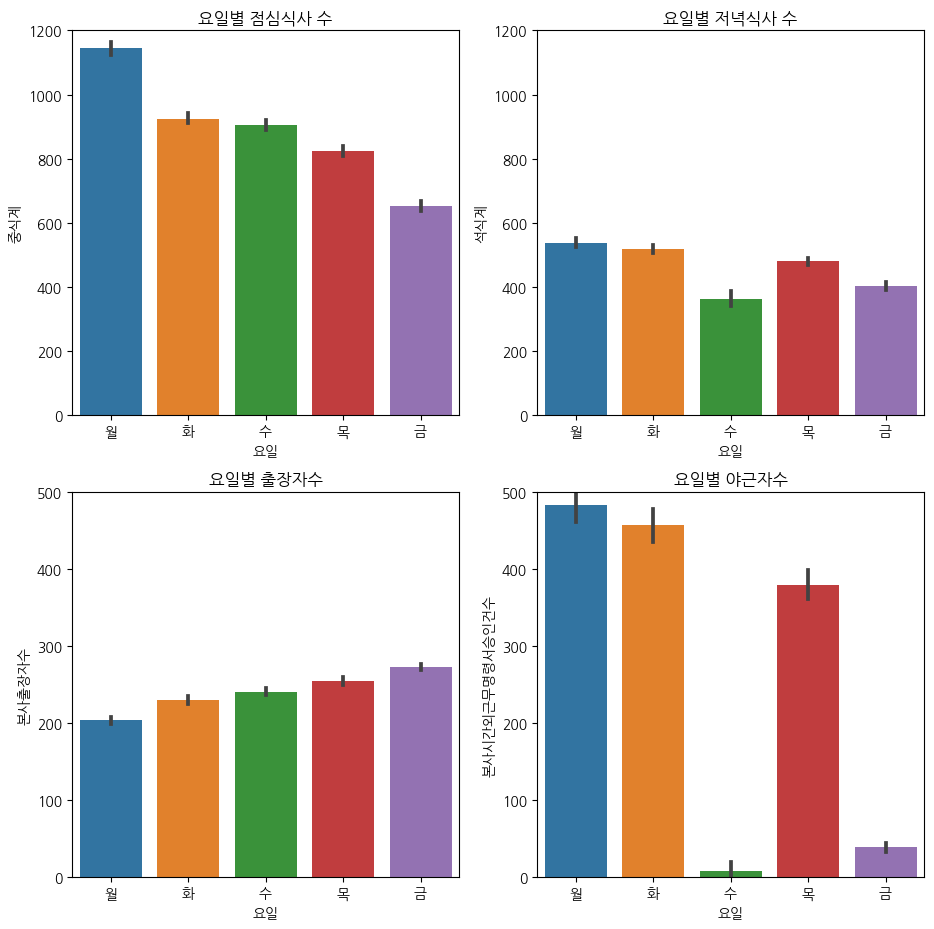

In [29]:
# x123123 = np.linspace(0.0, 4.0)
# x2 = np.linspace(0.0, 4.0)
# y = np.linspace(0.0, 1200.0)
# y2 = np.linspace(0.0, 1200.0)

# fig, ax = plt.subplots()
plt.figure(figsize=(11,11))

plt.subplot(2, 2, 1)
plt.ylim((0,1200))
sns.barplot(x="요일", y="중식계", data=df)
# ax.set_ylim(0, 1200)
plt.title("요일별 점심식사 수")

plt.subplot(2, 2, 2)
plt.ylim((0,1200))
sns.barplot(x="요일", y="석식계" , data=df)
plt.title("요일별 저녁식사 수")

plt.subplot(2, 2, 3)
plt.ylim((0,500))
sns.barplot(x="요일", y="본사출장자수", data=df)
# ax.set_ylim(0, 1200)
plt.title("요일별 출장자수") #왜 금요일엔 출장을 많이 갈까? 알 수 없다.. 증말.. 

plt.subplot(2, 2, 4)
plt.ylim((0,500))
sns.barplot(x="요일", y="본사시간외근무명령서승인건수" , data=df)
plt.title("요일별 야근자수") 
#야근을 안해도 저녁식사하는 비율이 생각보다 높다는? 것을 알 수 있다.
#집에 가기전에 밥먹고 퇴근!!


plt.show()

Text(0.5, 1.0, '요일별 야근자수')

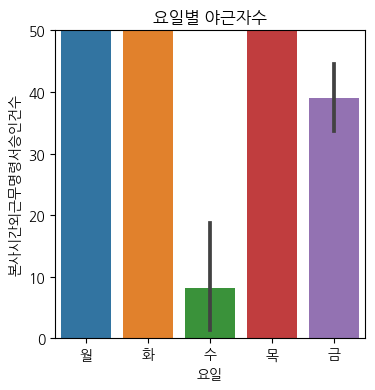

In [30]:
plt.figure(figsize=(4,4))
plt.ylim((0,50))
sns.barplot(x="요일", y="본사시간외근무명령서승인건수" , data=df)
plt.title("요일별 야근자수") 
#(마지막 그래프 확대본)
#수요일에 야근하는 비율은 평균적으로 7~8명이다.

In [31]:
#야근자 데이터를 직접 눈으로 보자.
df.sort_values('본사시간외근무명령서승인건수', ascending=True).head(20)
#v

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,실제점심식사가능자수
317,2017-05-17,수,2637,46,268,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 대구매운탕 검정...,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 쇠고기장조림 동태전 미나리오이무침 포기...,쌀밥/잡곡밥 (쌀:국내산) 차돌박이찌개 갈치양념조림 비엔나컬리플라워볶음 얼갈이...,864.0,484.0,2323.0
962,2020-01-10,금,2821,264,262,0,3.0,"모닝롤/케익 우유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 콩비지찌개 연근조...",참치회덮밥 (쌀:국내산) 미소장국 또띠아피자 과일샐러드 락교 포기김치 (김치...,쌀밥/잡곡밥 (쌀:국내산) 청국장찌개 소고기장조림 김치전 청경채겉절이 포기김...,573.0,320.0,2292.0
514,2018-03-07,수,2714,41,238,0,0.0,모닝롤/초코핫케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,콩나물밥 (쌀:국내산) 가쯔오국 삼치구이 떡잡채 얼갈이나물 깍두기 (김치:국...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 삼겹살구이 쫄면무침 봄동겉절이 포기김치 ...,1057.0,600.0,2435.0
967,2020-01-17,금,2821,242,269,0,0.0,"모닝롤/꿀호떡 우유/주스 계란후라이 팥죽/쌀밥 (쌀,닭:국내산) 무채국 연두부*...",김치필라프 (쌀:국내산) 크림스프 토마토스파게티 콥샐러드 수제피클 열무김치 ...,"쌀밥/잡곡밥 (쌀:국내산) 짬뽕국 미니떡갈비조림 (돼지고기:국내산,소고기:호주산)...",696.0,344.0,2310.0
257,2017-02-15,수,2632,51,233,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 북어국 아삭고추...,쌀밥/잡곡밥 (쌀:국내산) 들깨시래기국 순살파닭 해물김치전 다시마쌈 포기김치...,쌀밥/잡곡밥 (쌀:국내산) 오징어국 돈육장조림 황태양념구이 시금치나물 포기김...,1045.0,505.0,2348.0
252,2017-02-08,수,2632,52,206,0,0.0,모닝롤/사과파이 우유/주스 스크램블에그 호박죽/쌀밥 (쌀:국내산) 아욱된장국 어...,콩나물밥 (쌀:국내산) 맑은국 닭오븐구이 춘권*칠리소스 물미역무침 포기김치 ...,쌀밥/잡곡밥 열무된장국 삼겹살구이 두부찜 쫑상추무침 김치볶음 (김치:국내산),1068.0,548.0,2374.0
975,2020-01-31,금,2821,183,265,0,0.0,모닝롤/참치샌드 우유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 대구탕 느타리호박...,"김치제육덮밥 (쌀,돈육:국내산) 계란국 오징어튀김 (오징어:원양산) 시저샐러드 ...",쌀밥/잡곡밥 (쌀:국내산) 매운콩나물국 돈육장조림 (돈육:국내산) 맛살전 양념깻...,623.0,368.0,2373.0
247,2017-02-01,수,2632,61,179,0,0.0,모닝롤/옥수수샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 황태국 검정...,쌀밥/잡곡밥 (쌀:국내산) 시금치된장국 고추장불고기 닭살겨자채 모듬쌈 포기김...,쌀밥/잡곡밥 차돌박이찌개 장어강정 어묵꽈리고추볶음 통도라지구이 포기김치 (...,1260.0,566.0,2392.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,2415.0
519,2018-03-14,수,2714,56,245,0,0.0,모닝롤/단호박샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 조랭이미역국 ...,쌀밥/잡곡밥 (쌀:국내산) 시금치된장국 탕수어 두부*김치볶음 시래기지짐 깍두...,쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개 유자청돈육볶음 옥수수전 무생채 포기김치...,948.0,464.0,2413.0


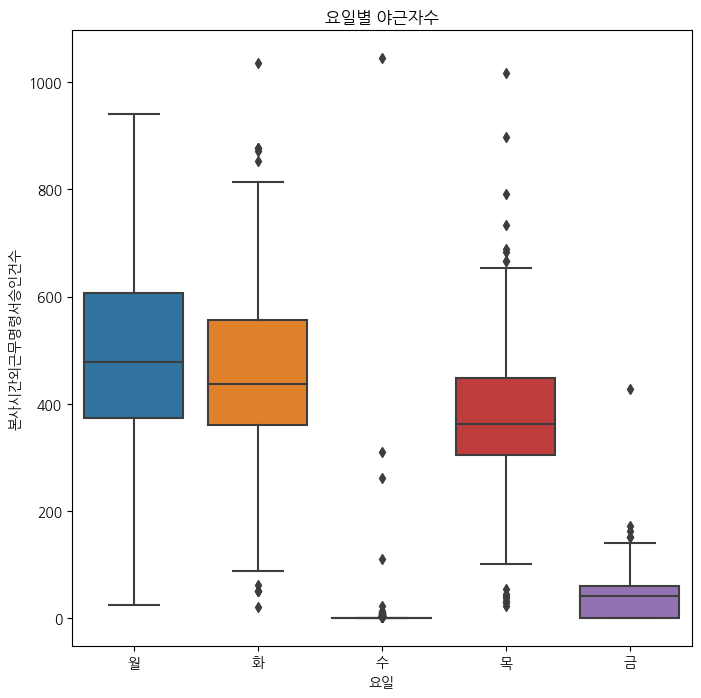

In [32]:
#중앙값을 알아보기 위해 box플럿 이용
plt.figure(figsize=(8,8))


sns.boxplot(x="요일", y="본사시간외근무명령서승인건수", data=df)
plt.title("요일별 야근자수")

plt.show()

#결론적으로 수요일에 야근하는 수는 중간값 0명에 가깞다. 1000명 넘게 야근한 하루의 이상치로 인해 평균이 7~8명으로 상승한 것으로 보인다.
#수요일에 야근은 없다.


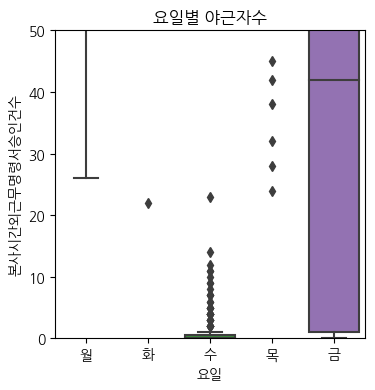

In [33]:
#금요일에 야근비율은 중간값 40명 정도 된다.
plt.figure(figsize=(4,4))

plt.ylim((0,50))
sns.boxplot(x="요일", y="본사시간외근무명령서승인건수", data=df)
plt.title("요일별 야근자수")

plt.show()

요일별 식사량

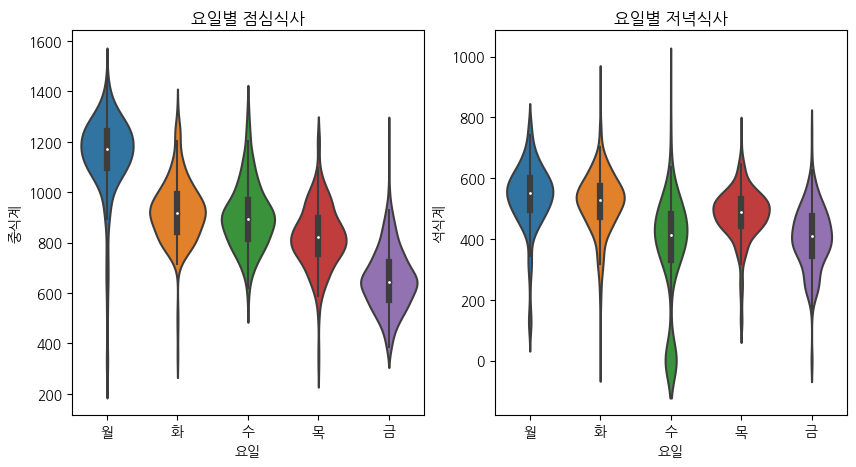

In [34]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.violinplot(x="요일", y="중식계", data=df)
plt.title("요일별 점심식사")

plt.subplot(1, 2, 2)
sns.violinplot(x="요일", y="석식계", data=df)
plt.title("요일별 저녁식사")

plt.show()

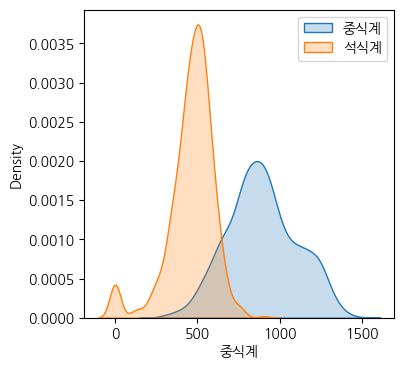

In [35]:
plt.figure(figsize=(4,4))
sns.kdeplot(df['중식계'], label='중식계', shade=True)
sns.kdeplot(df['석식계'], label='석식계',shade=True)
plt.legend()
plt.show()
#같이 그려봄

<Figure size 400x400 with 0 Axes>

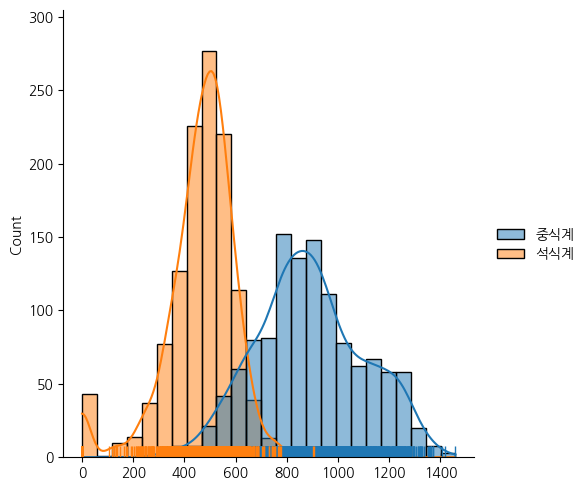

In [36]:
plt.figure(figsize=(4,4))
sns.displot(data=df[['중식계', '석식계']], kde=True, rug=True) #rug = 개수 시각화, kde=라인여부
# sns.displot(data=df['석식계'], kde=True, color='blue') 

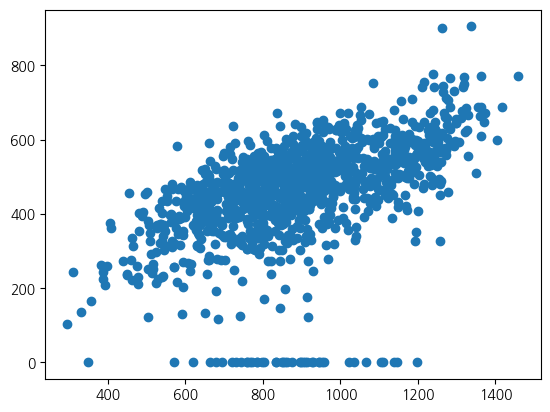

In [37]:
plt.scatter(df['중식계'],df['석식계'])

plt.show()

#x축은 점심식사한 수, y축은 저녁식사한 수
#양의 상관관계가 있으나.. 가장 밑에.. 저거 뭐지?
#점심식사는 하고, 저녁식사는 하지 않는 이상한 날들이 있다..

In [38]:
# 원본 데이터를 살펴보자!!!
# pd.set_option('display.max_rows', None)
df.sort_values('석식계', ascending=True).head(50)

#석식메뉴가 비어있거나 메뉴가 써 있지 않으면, 저녁엔 구내식당이 문을 닫는다.

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,실제점심식사가능자수
492,2018-01-31,수,2655,56,223,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩가루배추국 명엽...,김치제육덮밥 미소장국 양장피잡채 계란찜 아삭고추무침/귤 알타리김치 (김치:...,*,1138.0,0.0,2376.0
853,2019-07-31,수,2760,495,231,0,0.0,모닝롤/단호박찐빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 열무된장국 ...,곤드레밥*양념장 (쌀:국내산) 맑은국 해물누룽지탕 (오징어:원양산) 메밀전병만두 ...,자기계발의날,619.0,0.0,2034.0
468,2017-12-27,수,2665,169,255,0,0.0,모닝롤/씨크립샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 북어콩나물국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기미역국 오징어볶음 동그랑땡전 무쌈말이 포기김...,*,571.0,0.0,2241.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0,2339.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0,2305.0
912,2019-10-30,수,3121,122,294,1,0.0,모닝롤/오렌지케익빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 황태국 (황...,"마파두부덮밥 (쌀,돈육:국내산) 맑은국 치킨핑거 (닭:국내산) 시저샐러드 무비트...",*,771.0,0.0,2705.0
828,2019-06-26,수,2758,69,282,0,0.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩가루배추국 ...,"카레덮밥 (쌀,돈육:국내산) 가쯔오장국 고구마치즈구이 쫄면무침 무말랭이 포기...",* 자기개발의날 *,946.0,0.0,2407.0
993,2020-02-26,수,2872,109,190,4,0.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 홍합탕 감자...,"낙지비빔밥 (쌀:국내,낙지:중국산) 팽이장국 치킨텐더*콘소스D (닭:국내산) 과일...",자기개발의날,1105.0,0.0,2573.0
549,2018-04-25,수,2714,66,285,0,0.0,모닝롤/롤케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 아욱된장국 감자...,비빔밥 (쌀:국내산) 유부장국 오징어튀김 떡밤초 요플레 포기김치 (김치:국내산),,851.0,0.0,2363.0
955,2019-12-31,화,3111,709,149,22,0.0,모닝롤/야채샌드 우유/주스 스크램블에그 고구마죽/쌀밥 (쌀:국내산) 열무된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 닭볶음탕 (닭:국내산) 부추깻잎전 양배추쌈...,*,349.0,0.0,2253.0


In [39]:
#테스트 데이터에도 석식메뉴가 없는 날이 있을까?
pd.set_option('display.max_rows', None)
df_test



#없다.  = 석식계가 0인날은 이상치로 규정해도 무방하다!

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


In [40]:
#석식 없는날을 선별하고 제거하자.
석식없는날 = 인트만.loc[df['석식계'] == 0, :]
석식있는날 = 인트만.loc[df['석식계'] != 0, :]
이상치제거한인트 = 석식있는날

In [41]:
석식없는날

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
204,3,2689,68,207,0,0.0,1109.0,0.0,2414.0,2016,11,30
224,3,2705,166,225,0,0.0,767.0,0.0,2314.0,2016,12,28
244,3,2697,79,203,0,0.0,720.0,0.0,2415.0,2017,1,25
262,3,2632,75,252,0,0.0,1065.0,0.0,2305.0,2017,2,22
281,3,2627,53,235,0,0.0,953.0,0.0,2339.0,2017,3,22
306,3,2626,45,304,0,0.0,835.0,0.0,2277.0,2017,4,26
327,3,2637,43,265,0,0.0,910.0,0.0,2329.0,2017,5,31
346,3,2648,58,259,0,0.0,745.0,0.0,2331.0,2017,6,28
366,3,2839,254,246,0,0.0,797.0,0.0,2339.0,2017,7,26
392,5,2642,177,303,45,0.0,663.0,0.0,2162.0,2017,9,1


In [42]:
이상치제거한인트.sort_values('석식계', ascending=True).head(10) #석식없는날 결측치 제거 완료된 모습

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
705,1,2846,894,159,26,0.0,296.0,104.0,1793.0,2018,12,24
971,4,2821,481,141,38,0.0,685.0,117.0,2199.0,2020,1,23
1038,1,2962,1113,117,91,189.0,504.0,123.0,1543.0,2020,5,4
882,3,3111,426,135,0,0.0,916.0,123.0,2550.0,2019,9,11
950,1,3111,343,228,131,0.0,741.0,124.0,2540.0,2019,12,23
1187,4,2990,777,160,24,273.0,591.0,131.0,1780.0,2020,12,24
954,1,3111,563,192,98,0.0,652.0,132.0,2356.0,2019,12,30
709,1,2846,1085,132,28,0.0,332.0,135.0,1629.0,2018,12,31
245,4,2697,369,117,28,0.0,844.0,147.0,2211.0,2017,1,26
1129,1,3132,985,188,81,142.0,358.0,165.0,1817.0,2020,9,28


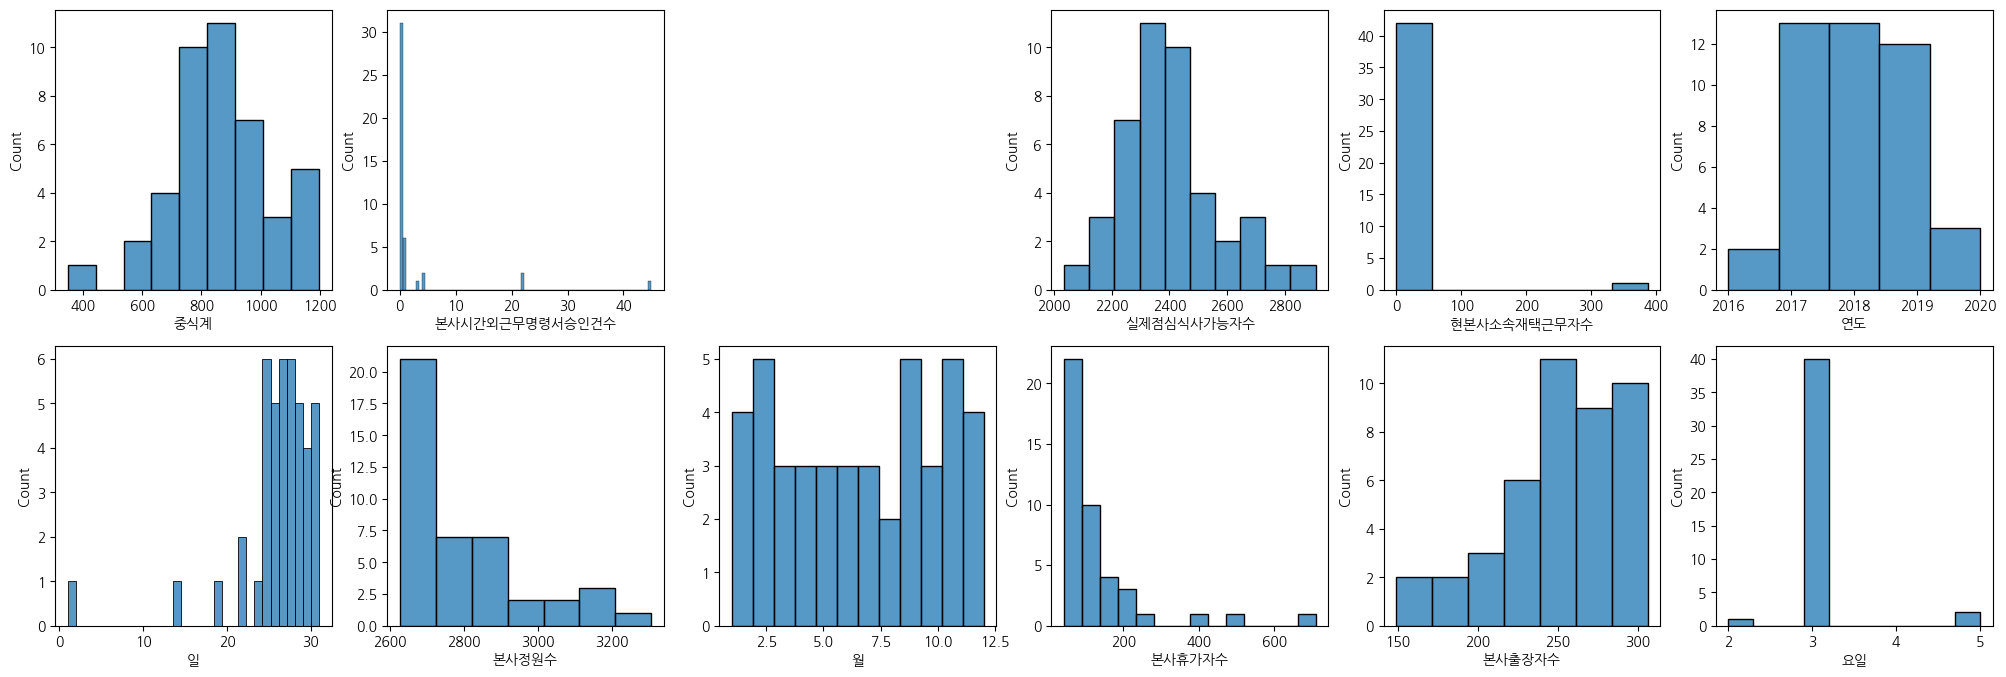

In [43]:
#우리가 이상치로 규정한 석식없는날을 기준으로 다시 그래프를 그려봤다.

plt.figure(figsize=(25,8))
plt.subplot(2, 6, 1)
sns.histplot(석식없는날['중식계'])

plt.subplot(2, 6, 2)
sns.histplot(석식없는날['본사시간외근무명령서승인건수'])

# plt.subplot(2, 6, 3)
# sns.histplot(석식없는날['석식계'])

plt.subplot(2, 6, 4)
sns.histplot(석식없는날['실제점심식사가능자수'])

plt.subplot(2, 6, 5)
sns.histplot(석식없는날['현본사소속재택근무자수'])

plt.subplot(2, 6, 6)
sns.histplot(석식없는날['연도'], bins=5)

plt.subplot(2, 6, 7)
sns.histplot(석식없는날['일'], bins=31)

plt.subplot(2, 6, 8)
sns.histplot(석식없는날['본사정원수'])

plt.subplot(2, 6, 9)
sns.histplot(석식없는날['월'], bins=12)

plt.subplot(2, 6, 10)
sns.histplot(석식없는날['본사휴가자수'])

plt.subplot(2, 6, 11)
sns.histplot(석식없는날['본사출장자수'])

plt.subplot(2, 6, 12)
sns.histplot(석식없는날['요일'], bins=10)

plt.show()

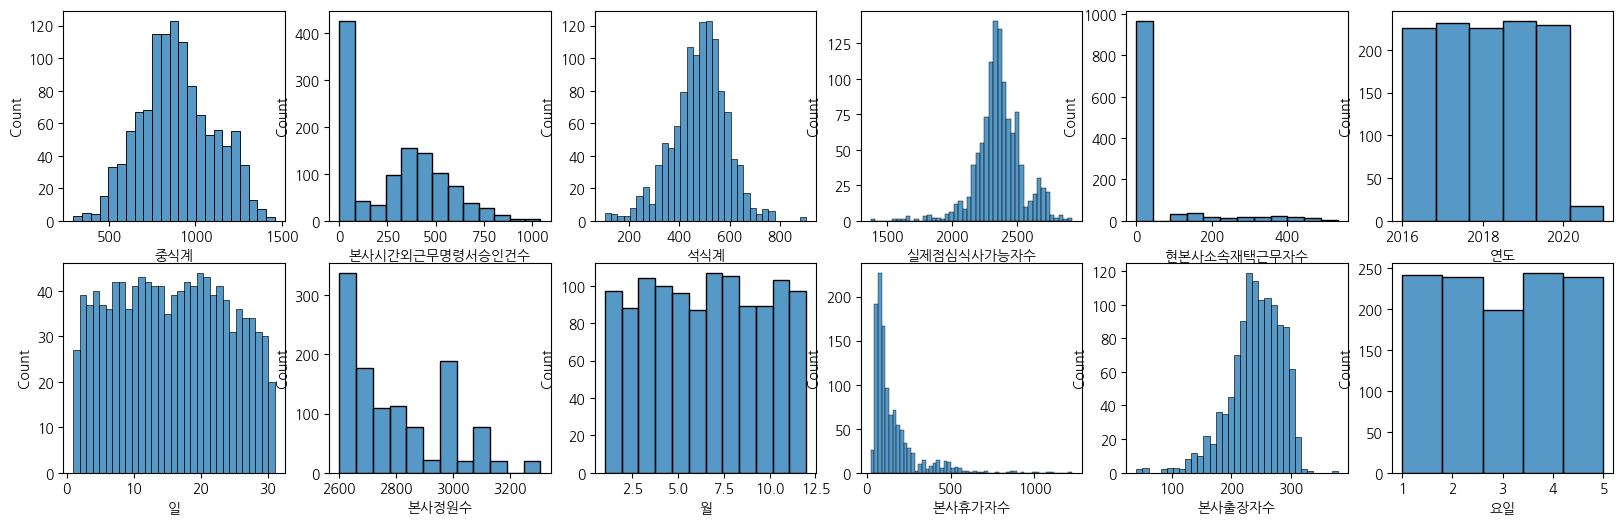

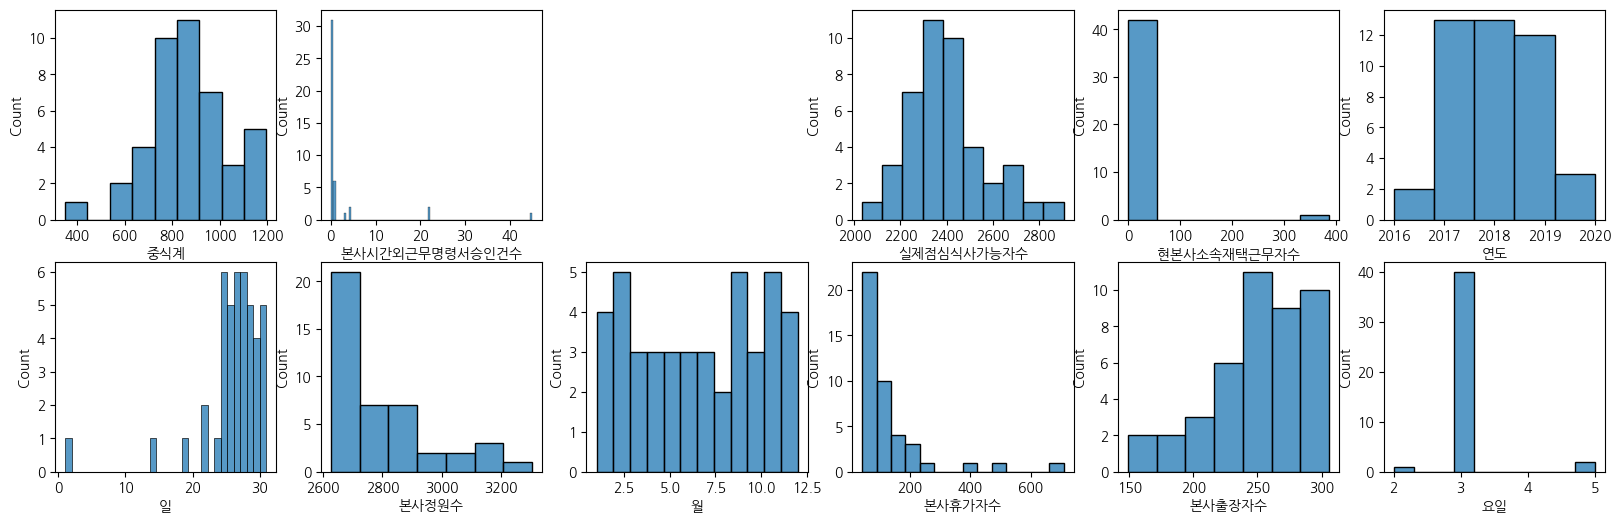

In [44]:
plt.figure(figsize=(20,6))

plt.subplot(2, 6, 1)
sns.histplot(이상치제거한인트['중식계'])

plt.subplot(2, 6, 2)
sns.histplot(이상치제거한인트['본사시간외근무명령서승인건수'])

plt.subplot(2, 6, 3)
sns.histplot(이상치제거한인트['석식계'])

plt.subplot(2, 6, 4)
sns.histplot(이상치제거한인트['실제점심식사가능자수'])

plt.subplot(2, 6, 5)
sns.histplot(이상치제거한인트['현본사소속재택근무자수'])

plt.subplot(2, 6, 6)
sns.histplot(이상치제거한인트['연도'], bins=6)

plt.subplot(2, 6, 7)
sns.histplot(이상치제거한인트['일'], bins=31)

plt.subplot(2, 6, 8)
sns.histplot(이상치제거한인트['본사정원수'])

plt.subplot(2, 6, 9)
sns.histplot(이상치제거한인트['월'], bins=12)

plt.subplot(2, 6, 10)
sns.histplot(이상치제거한인트['본사휴가자수'])

plt.subplot(2, 6, 11)
sns.histplot(이상치제거한인트['본사출장자수'])

plt.subplot(2, 6, 12)
sns.histplot(이상치제거한인트['요일'], bins=5)




plt.figure(figsize=(20,6))
plt.subplot(2, 6, 1)
sns.histplot(석식없는날['중식계'])

plt.subplot(2, 6, 2)
sns.histplot(석식없는날['본사시간외근무명령서승인건수'])

# plt.subplot(2, 6, 3)
# sns.histplot(석식없는날['석식계'])

plt.subplot(2, 6, 4)
sns.histplot(석식없는날['실제점심식사가능자수'])

plt.subplot(2, 6, 5)
sns.histplot(석식없는날['현본사소속재택근무자수'])

plt.subplot(2, 6, 6)
sns.histplot(석식없는날['연도'], bins=5)

plt.subplot(2, 6, 7)
sns.histplot(석식없는날['일'], bins=31)

plt.subplot(2, 6, 8)
sns.histplot(석식없는날['본사정원수'])

plt.subplot(2, 6, 9)
sns.histplot(석식없는날['월'], bins=12)

plt.subplot(2, 6, 10)
sns.histplot(석식없는날['본사휴가자수'])

plt.subplot(2, 6, 11)
sns.histplot(석식없는날['본사출장자수'])

plt.subplot(2, 6, 12)
sns.histplot(석식없는날['요일'], bins=10)

plt.show()


#이상치의 경우, 일자와 요일의 그래프가 기존 그래프와는 명확히 다르다.

In [45]:
# co_only_no_dinner = 석식칼럼도없는날수요일만.corr()
# 석식칼럼도없는날수요일만

In [46]:
# sns.clustermap(co_only_no_dinner, 
#                annot = True,      # 실제 값 화면에 나타내기
#                cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
#                vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
#               )

# ValueError: The condensed distance matrix must contain only finite values.
# 석식의 값이 모두 0이라 상관관계를 그릴 수 없는 것이었다!!
# 석식 줄을 지워보자.

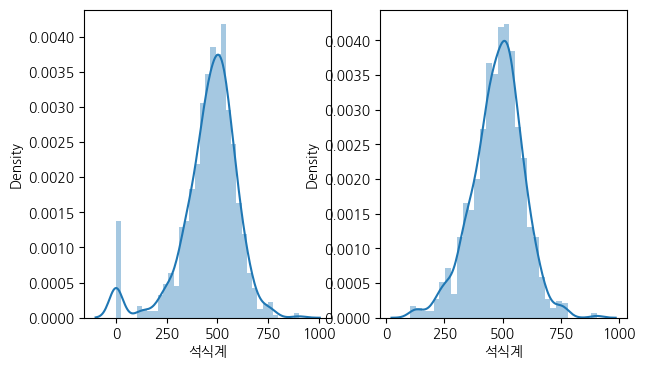

In [47]:
plt.figure(figsize=(7,4))

plt.subplot(1, 2, 1)
sns.distplot(인트만['석식계'], kde=True)

plt.subplot(1, 2, 2)
sns.distplot(이상치제거한인트['석식계'], kde=True)
plt.show()

#이상치 제거 후 정규분포가 더욱 뚜렷해졌다.

요일별 출장자수 분석

In [49]:
이상치제거한인트.info()
# 행의 수는 1162개인데 index는 1204개다.
# 인덱스를 재정렬할 필요가 있어보인다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              1162 non-null   int64  
 1   본사정원수           1162 non-null   int64  
 2   본사휴가자수          1162 non-null   int64  
 3   본사출장자수          1162 non-null   int64  
 4   본사시간외근무명령서승인건수  1162 non-null   int64  
 5   현본사소속재택근무자수     1162 non-null   float64
 6   중식계             1162 non-null   float64
 7   석식계             1162 non-null   float64
 8   실제점심식사가능자수      1162 non-null   float64
 9   연도              1162 non-null   int64  
 10  월               1162 non-null   int64  
 11  일               1162 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 118.0 KB


In [50]:
이상치제거한인트.reset_index(drop=True, inplace=True) #인덱스 재정렬 완료
이상치제거한인트.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              1162 non-null   int64  
 1   본사정원수           1162 non-null   int64  
 2   본사휴가자수          1162 non-null   int64  
 3   본사출장자수          1162 non-null   int64  
 4   본사시간외근무명령서승인건수  1162 non-null   int64  
 5   현본사소속재택근무자수     1162 non-null   float64
 6   중식계             1162 non-null   float64
 7   석식계             1162 non-null   float64
 8   실제점심식사가능자수      1162 non-null   float64
 9   연도              1162 non-null   int64  
 10  월               1162 non-null   int64  
 11  일               1162 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 109.1 KB


In [51]:
# train['요일'] = train['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
# test['요일'] = test['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

In [52]:
X_train = 이상치제거한인트.drop(['중식계', '석식계'],axis=1 ) #중석식 컬럼 제거
y1_train = 이상치제거한인트['중식계'] #중식담기
y2_train = 이상치제거한인트['석식계'] #석식담기

In [53]:
X_train.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,실제점심식사가능자수,연도,월,일
0,1,2601,50,150,238,0.0,2401.0,2016,2,1
1,2,2601,50,173,319,0.0,2378.0,2016,2,2
2,3,2601,56,180,111,0.0,2365.0,2016,2,3
3,4,2601,104,220,355,0.0,2277.0,2016,2,4
4,5,2601,278,181,34,0.0,2142.0,2016,2,5


In [54]:
y1_train.head()

0    1039.0
1     867.0
2    1017.0
3     978.0
4     925.0
Name: 중식계, dtype: float64

In [55]:
y2_train.head()

0    331.0
1    560.0
2    573.0
3    525.0
4    330.0
Name: 석식계, dtype: float64

test 데이터 전처리

In [56]:
df_test['실제점심식사가능자수'] = df_test['본사정원수']-df_test['본사휴가자수']-df_test['본사출장자수']-df_test['현본사소속재택근무자수']

df_test = df_test.drop(labels= '조식메뉴', axis=1)
df_test = df_test.drop(labels= '중식메뉴', axis=1)
df_test = df_test.drop(labels= '석식메뉴', axis=1)

df_test['일자']= pd.to_datetime(df_test['일자'])
df_test['연도'] = df_test['일자'].dt.year
df_test['월'] = df_test['일자'].dt.month
df_test['일'] = df_test['일자'].dt.day
df_test = df_test.drop(['일자'], axis=1)

weekday = {"월": 1, "화": 2, "수": 3, "목": 4, "금": 5}
df_test["요일"] = df_test["요일"].map(weekday)


In [57]:
df_test.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,실제점심식사가능자수,연도,월,일
0,3,2983,88,182,5,358.0,2355.0,2021,1,27
1,4,2983,104,212,409,348.0,2319.0,2021,1,28
2,5,2983,270,249,0,294.0,2170.0,2021,1,29
3,1,2924,108,154,538,322.0,2340.0,2021,2,1
4,2,2924,62,186,455,314.0,2362.0,2021,2,2


In [58]:
X_test = df_test

In [76]:
# #로그화

# X_train['본사휴가자수'] = np.log(X_train['본사휴가자수'])
# X_train['본사정원수'] = np.log(X_train['본사정원수'])
# X_train['본사출장자수'] = np.log(X_train['본사출장자수'])

# X_test['본사휴가자수'] = np.log(X_test['본사휴가자수'])
# X_test['본사정원수'] = np.log(X_test['본사정원수'])
# X_test['본사출장자수'] = np.log(X_test['본사출장자수'])

# # 로그화 시도 후 그래프 변화

# plt.figure(figsize=(20,10))

# plt.subplot(2, 3, 1)
# sns.histplot(df['본사휴가자수'])

# plt.subplot(2, 3, 2)
# sns.histplot(df['본사출장자수'])

# plt.subplot(2, 3, 3)
# sns.histplot(df['본사정원수'])

# plt.subplot(2, 3, 4)
# sns.histplot(X_train['본사휴가자수'])

# plt.subplot(2, 3, 5)
# sns.histplot(X_train['본사출장자수'])

# plt.subplot(2, 3, 6)
# sns.histplot(X_train['본사정원수'])


In [60]:
# 기본세팅


# model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
# model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

# model1.fit(x_train, y1_train)
# model2.fit(x_train, y2_train)

# pred1 = model1.predict(x_test)
# pred2 = model2.predict(x_test)

# submission['중식계'] = pred1
# submission['석식계'] = pred2

# submission.to_csv('baseline.csv', index=False)


### 회귀모델

##### 1. 랜덤포레스트

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [77]:
# # 랜덤포레스트
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()

# model.fit(X_train, y1_train)
# pred1 = model.predict(X_test) #점심예측

# model.fit(X_train, y2_train)
# pred2 = model.predict(X_test) #저녁예측


# submission['중식계'] = pred1
# submission['석식계'] = pred2

# submission.to_csv('baseline.csv', index=False)



# # 로그화 전
# # 92.938
# # 124.5585714286
# # 최고성능!


# # 로그화 진행시
# # 94.4883333333
# # 125.9071428571

##### 2. Xgboost

In [79]:
# # Xgboost 
# from xgboost import XGBRegressor
# model = XGBRegressor()

# model.fit(X_train, y1_train) 
# pred1 = model.predict(X_test) #점심예측

# model.fit(X_train, y2_train) 
# pred2 = model.predict(X_test) #저녁예측

# submission['중식계'] = pred1
# submission['석식계'] = pred2

# submission.to_csv('baseline.csv', index=False)



# # 101.6464773333
# # 132.2437648571

##### 3. xgb 최적파라미터 튜닝

In [80]:
# # RandomizedSearchCV 최적파라미터찾기
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# # 하이퍼파라미터
# params = {
#     'learning_rate': [0.0, 0.1, 0.09, 0.089, 0.08],
#     'boosting_type': ['gbtree', 'gblinear', 'dart'],
    
# }

# # RandomizedSearchCV
# xgb = XGBRegressor()
# grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
# grid.fit(X_train, y1_train)

# grid.best_params_

# # {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}

[21:30:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "boosting_type" } are not used.



{'learning_rate': 0.1, 'boosting_type': 'dart'}

In [82]:
# # 하이퍼파라미터 튜닝값으로 xgb예측
# # {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}
# # {'learning_rate': 0.1, 'boosting_type': 'dart'} -> 최고성능?

# xgb = XGBRegressor(
#     subsample =0.7,
#     n_estimators = 200,
#     max_depth = 3,
#     learning_rate = 0.1,
#     boosting_type ='dart'
# )


# xgb.fit(X_train, y1_train)
# pred1 = xgb.predict(X_test) #점심예측

# xgb.fit(X_train, y2_train)
# pred2 = xgb.predict(X_test) #저녁예측

# submission['중식계'] = pred1
# submission['석식계'] = pred2

# submission.to_csv('baseline.csv', index=False)


# # 초기 하이퍼 파라미터 튜닝 후 xgb
# # 96.2229916667
# # 123.9154814286	


# # 로그화 + 하이퍼 파라미터 튜닝 후 xgb
# # 81.013793
# # 112.7960591429
# # 최고 점수!!

[21:32:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "boosting_type" } are not used.

[21:32:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "boosting_type" } are not used.



##### 4. 랜덤포레스트 최적파라미터 튜닝

In [66]:
# from sklearn.model_selection import GridSearchCV #점심기준

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_train, y1_train)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# # 최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}
# # 최고 예측 정확도: 0.0069

In [67]:
# from sklearn.model_selection import GridSearchCV # 저녁기준

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_train, y2_train)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# # 최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 10}
# # 최고 예측 정확도: 0.0095

In [68]:
# # 랜덤포레스트 하이퍼파라미터 튜닝 후
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()



# #점심
# # 최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}
# rf_clf1 = RandomForestClassifier(
#                                 max_depth = 6,
#                                 min_samples_leaf = 18,
#                                 min_samples_split = 8,
#                                 n_estimators = 100, 
#                                 random_state = 0,
#                                 )
                                
# rf_clf1.fit(X_train, y1_train)
# pred1 = rf_clf1.predict(X_test)

# #저녁
# #최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 10}
# rf_clf2 = RandomForestClassifier(
#                                 max_depth = 10,
#                                 min_samples_leaf = 8,
#                                 min_samples_split = 20,
#                                 n_estimators = 10, 
#                                 random_state = 0,
#                                 )
# rf_clf2.fit(X_train, y2_train)
# pred2 = rf_clf2.predict(X_test) #저녁예측


# submission['중식계'] = pred1
# submission['석식계'] = pred2

# submission.to_csv('baseline.csv', index=False)


# # 135.1666666667
# # 154.0571428571

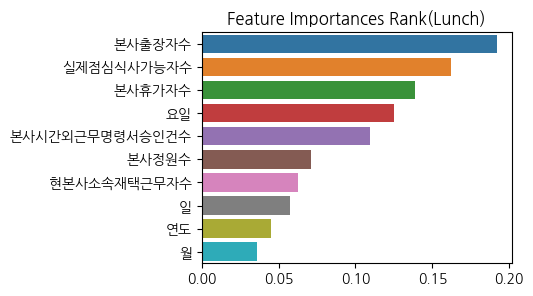

In [69]:
rf_clf1 = RandomForestClassifier(n_estimators = 200, 
                                max_depth = 3,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y1_train)
pred = rf_clf1.predict(X_test)

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top_ascending = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(4,3))
plt.title('Feature Importances Rank(Lunch)')
sns.barplot(x=ftr_top_ascending, y=ftr_top_ascending.index)
plt.show()

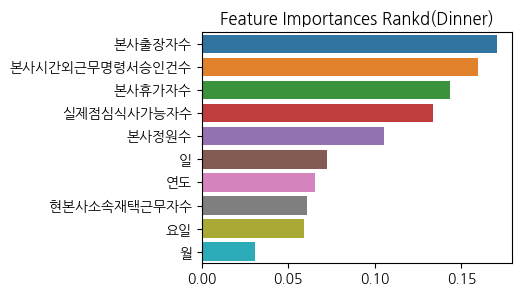

In [70]:
rf_clf1 = RandomForestClassifier(n_estimators = 200, 
                                max_depth = 3,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y2_train)
pred = rf_clf1.predict(X_test)

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top_ascending = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(4,3))
plt.title('Feature Importances Rankd(Dinner)')
sns.barplot(x=ftr_top_ascending, y=ftr_top_ascending.index)
plt.show()

> 하이퍼 튜닝 후 오히려 성능이 구려짐.. 어떤 이유인지 알고싶다.. ㅠ

In [72]:
df_test.tail()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,실제점심식사가능자수,연도,월,일
45,1,2973,125,174,704,331.0,2343.0,2021,4,5
46,2,2973,76,170,636,364.0,2363.0,2021,4,6
47,3,2973,96,214,1,334.0,2329.0,2021,4,7
48,4,2973,105,238,509,324.0,2306.0,2021,4,8
49,5,2973,259,268,0,229.0,2217.0,2021,4,9


In [74]:
pred1

array([1016.35,  943.5 ,  584.62, 1199.46, 1048.26, 1013.77,  965.35,
        635.9 , 1299.73, 1040.26,  814.67, 1221.25, 1090.76, 1034.52,
        857.13,  645.63, 1212.16, 1032.43,  831.38,  854.44,  612.2 ,
       1085.95,  979.57,  905.98,  637.81, 1261.83, 1153.82, 1013.35,
        918.92,  696.35, 1231.88,  985.41, 1007.55,  885.64,  649.68,
       1211.39,  976.84,  872.83,  839.51,  591.05, 1181.47, 1009.89,
        902.75,  827.08,  643.37, 1195.11, 1032.56,  951.1 ,  887.61,
        658.47])

In [75]:
pred2

array([407.73, 392.26, 253.65, 488.16, 399.09, 442.54, 435.3 , 353.91,
       640.49, 492.01, 224.38, 698.1 , 683.45, 424.72, 542.43, 374.11,
       690.5 , 654.65, 379.52, 516.82, 269.18, 619.37, 456.04, 517.96,
       363.01, 663.45, 662.45, 436.73, 508.19, 269.77, 667.36, 580.95,
       431.1 , 462.52, 253.12, 596.91, 568.37, 399.59, 394.69, 257.42,
       587.14, 555.42, 389.71, 387.62, 279.21, 576.09, 559.82, 393.64,
       450.33, 258.29])

2차 마무리